In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,AgglomerativeClustering ,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\PREM\Desktop\Assignment of DSA\Wine_clust .csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
df.shape

(178, 13)

In [7]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Preprocess the data by Standard scaling

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [9]:
scaler

StandardScaler()

In [10]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
# Trying out different clustering algorithms and finding the optimum number of clusters.

# K-means Clustering:


In [12]:
k_values = range(2,11)
kmeans_scores = []

In [13]:
for k in k_values:
    kmeans = KMeans(n_clusters=k ,random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data,kmeans.labels_)
    kmeans_scores.append(score)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\A

In [14]:
#Ploting the silhouette scores

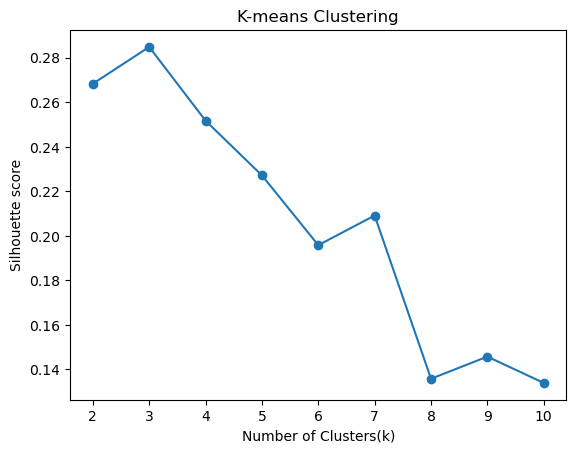

In [15]:
plt.plot(k_values , kmeans_scores ,marker ='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette score')
plt.title('K-means Clustering')
plt.show()

In [16]:
#Training KMeans Clustering Model
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y = kmeans.fit_predict(scaled_data)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


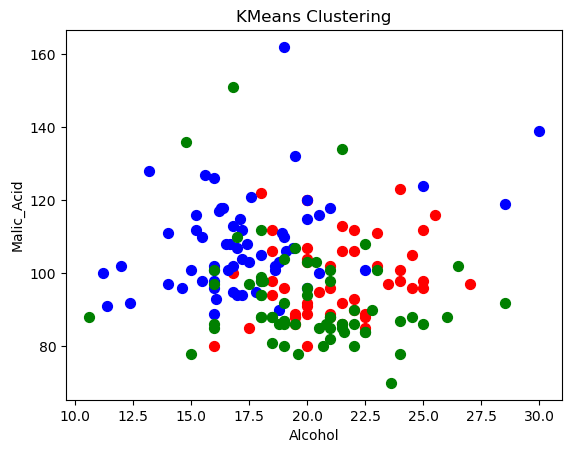

In [25]:
#Visualizing Clusters
plt.scatter(X[y==0,0], X[y==0,1], c='red', s=50)
plt.scatter(X[y==1,0], X[y==1,1], c='blue', s=50)
plt.scatter(X[y==2,0], X[y==2,1], c='green', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

In [17]:
#Observing the plot, we can identify the number of clusters that maximizes the silhouette score, 
#indicating the optimum number of clusters for K-means clustering.

# Agglomerative Clustering:

In [18]:
agglomerative_scores = []

In [19]:
for k in k_values:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(scaled_data)
    score = silhouette_score(scaled_data,agglomerative.labels_)
    agglomerative_scores.append(score)

In [20]:
#Plot the silhouette scores

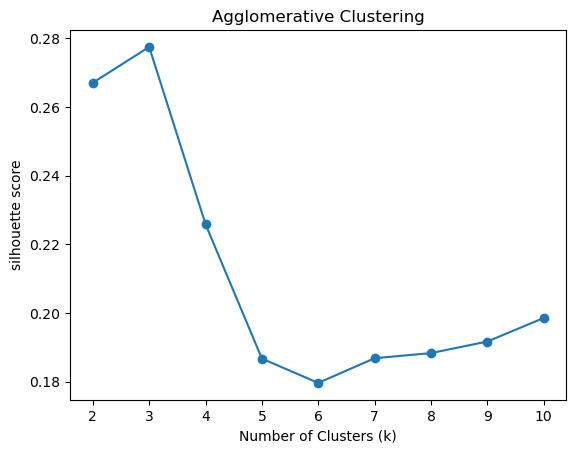

In [21]:
plt.plot(k_values , agglomerative_scores , marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette score')
plt.title('Agglomerative Clustering')
plt.show()

In [22]:
# Using the dendrogram to find the optimal number of clusters

In [23]:
X = df.iloc[:, [3, 4]].values

In [26]:
import scipy.cluster.hierarchy as sch

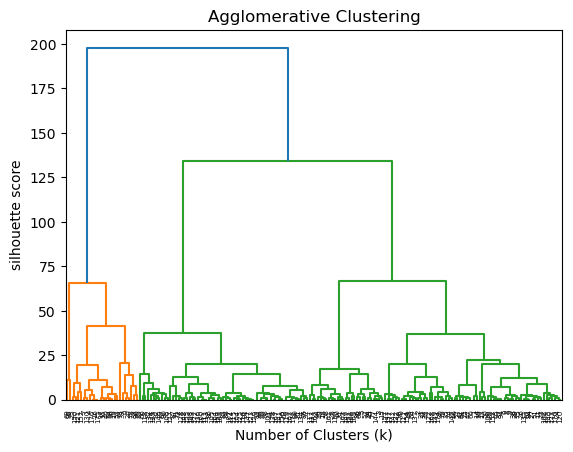

In [27]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette score')
plt.title('Agglomerative Clustering')
plt.show()

In [28]:
#Similar to K-means, we can analyze the silhouette scores plot to determine the optimal number of clusters for 
#Agglomerative clustering.

# DBSCAN Clustering

In [29]:
dbscan = DBSCAN(eps=0.5 , min_samples=5)
dbscan.fit(scaled_data)

DBSCAN()

In [30]:
n_clusters_dbscan = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

In [31]:
#Creating the final K-means model with the optimum number of clusters

In [32]:
optimal_k = k_values[np.argmax(kmeans_scores)]
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(scaled_data)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [33]:
# Creating the final Agglomerative model with the optimum number of clusters

In [34]:
optimal_k_agg = k_values[np.argmax(agglomerative_scores)]
agglomerative_final = AgglomerativeClustering(n_clusters=optimal_k_agg)
agglomerative_final.fit(scaled_data)

AgglomerativeClustering(n_clusters=3)